Goal:

1. Find 5 insights/observations from the data
2. Identify some possible link between the price of the petroleum products and external factors. Explain your observation
3. Create column to find price changes month over month
4. Create a summarized price and price movement by year
5. Predict the crude oil price for next 6 months
6. Identify the correlation between Conventional Gasoline prices between New York Harbor and U.S. Gulf Coast
7. Is there a month/quarter/year where prices of all Products were lower than prior data points


### The below screenshots represent a summary of the analysis of the findings and later followed by the code of how I went aboutcoding and coming up with analysis: 

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


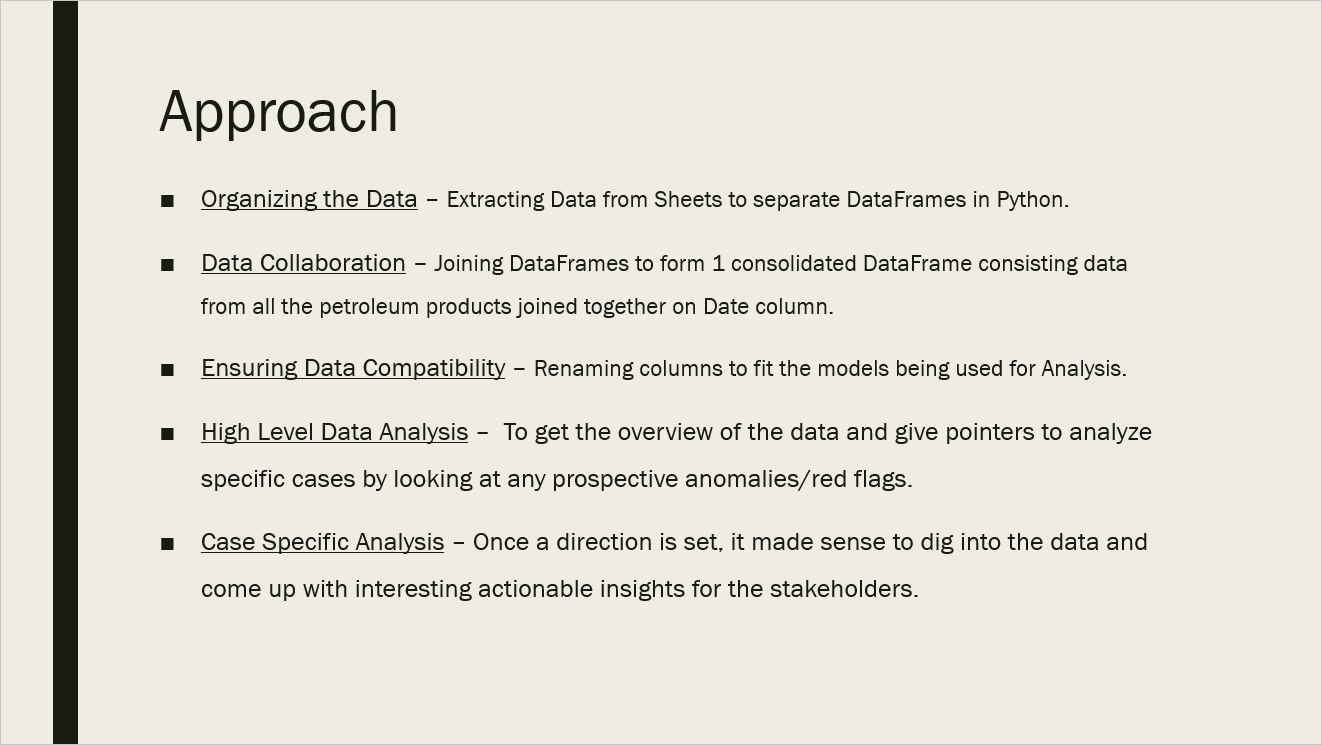

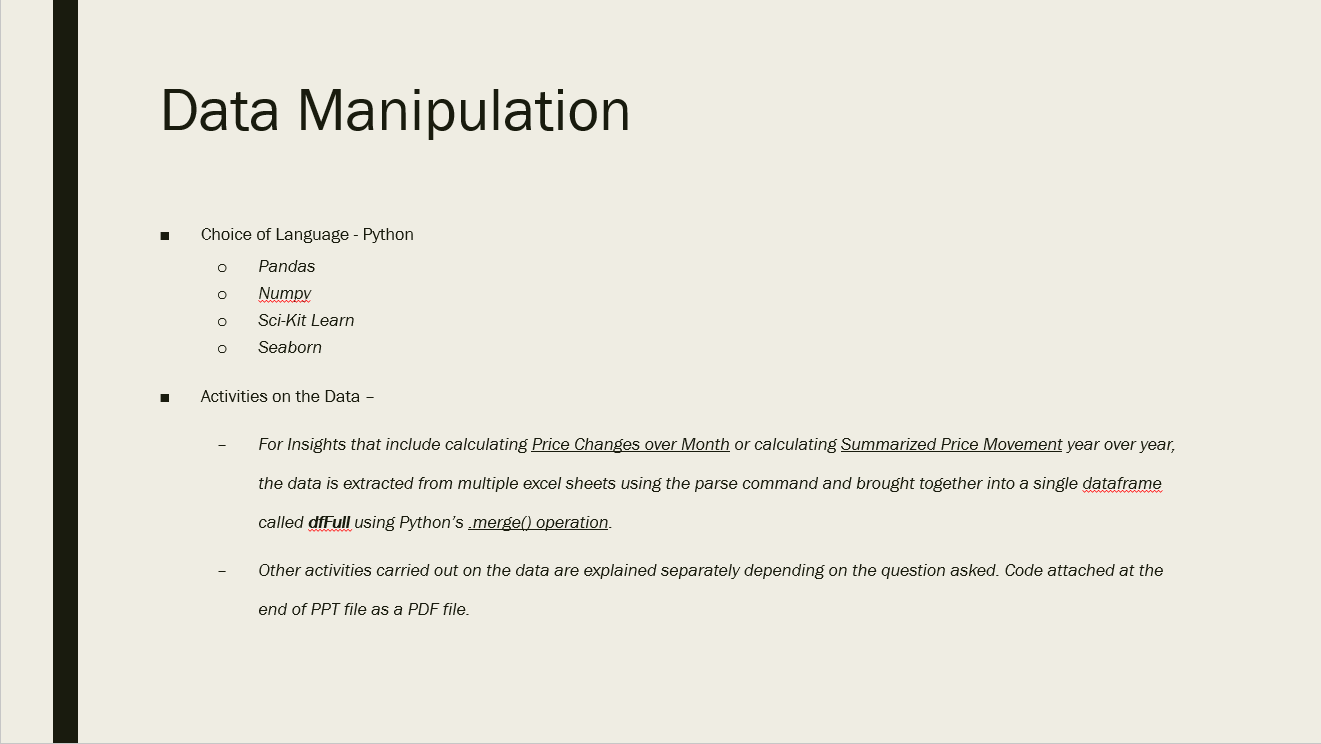

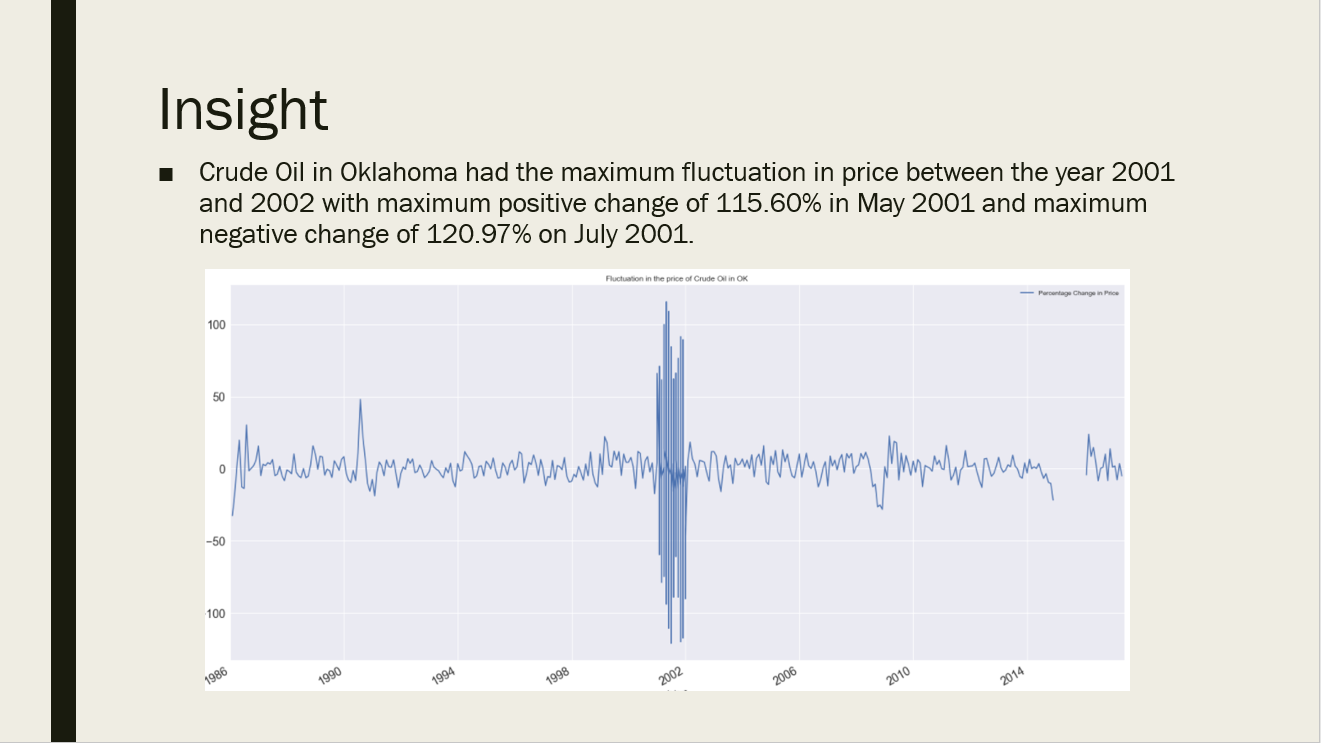

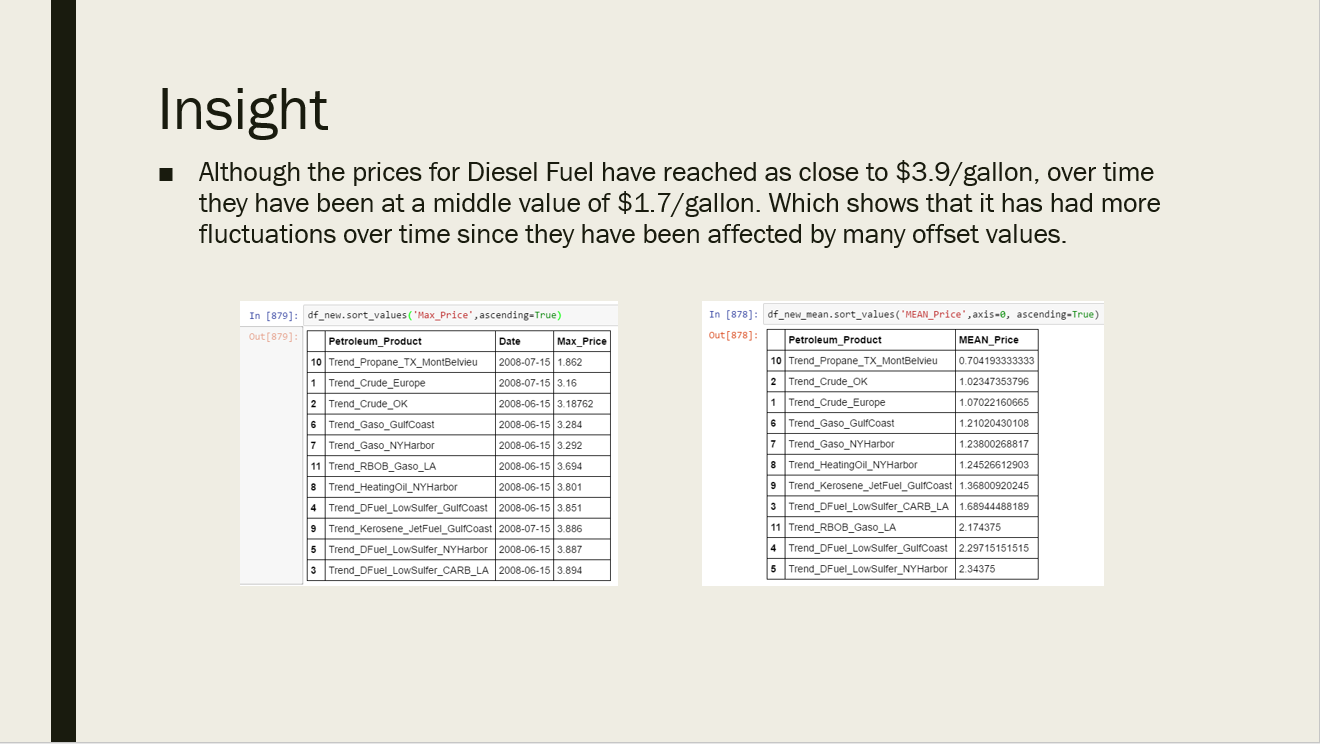

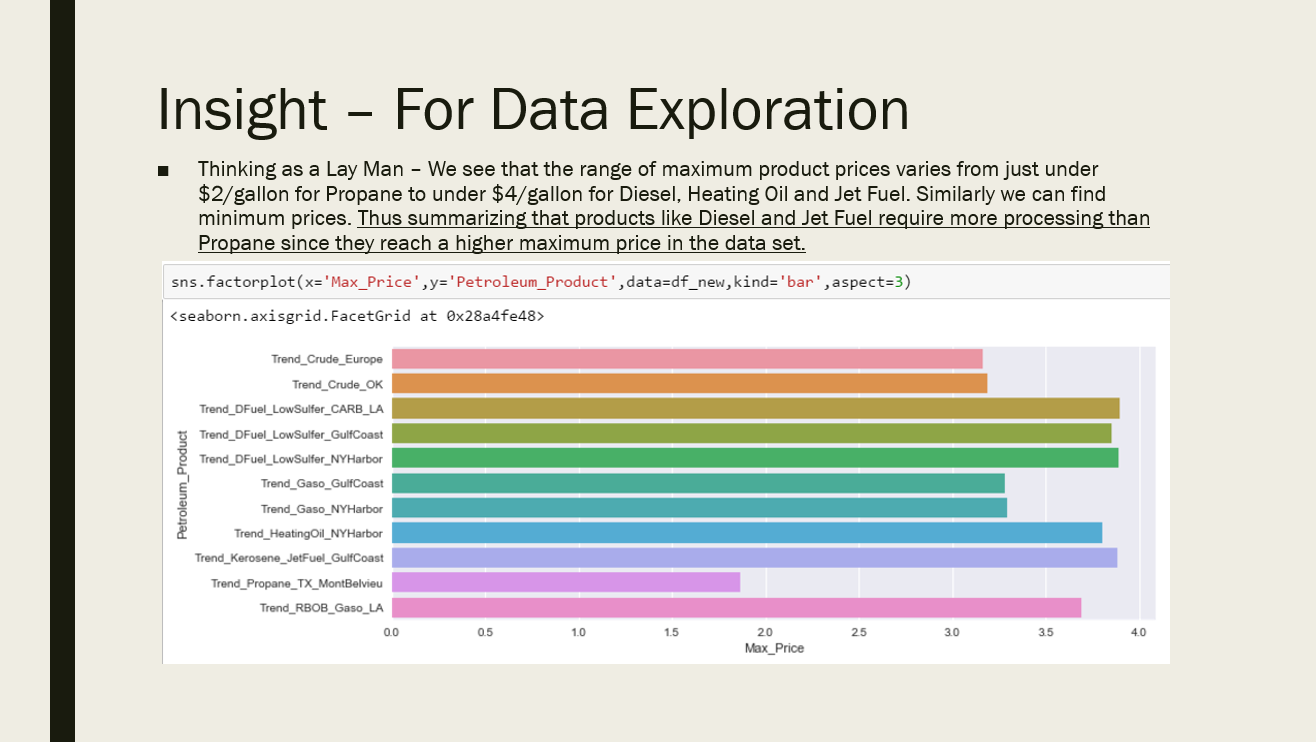

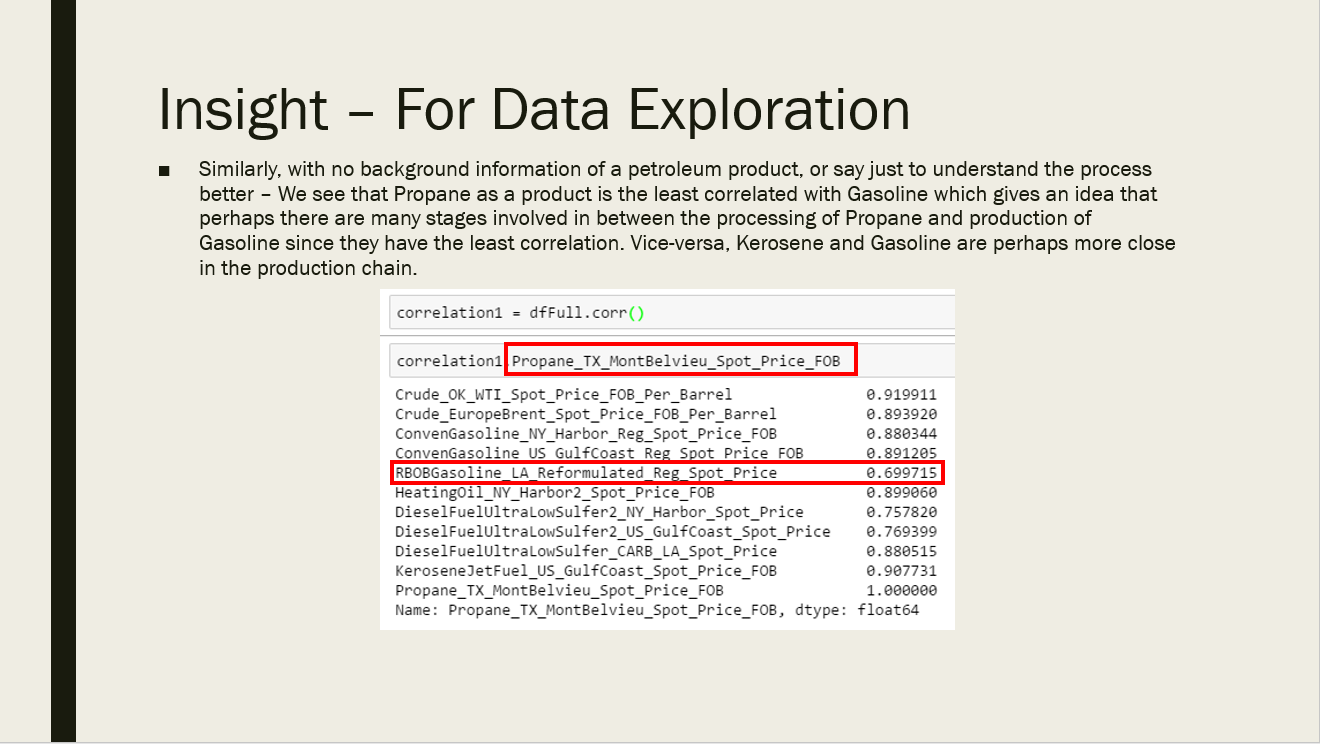

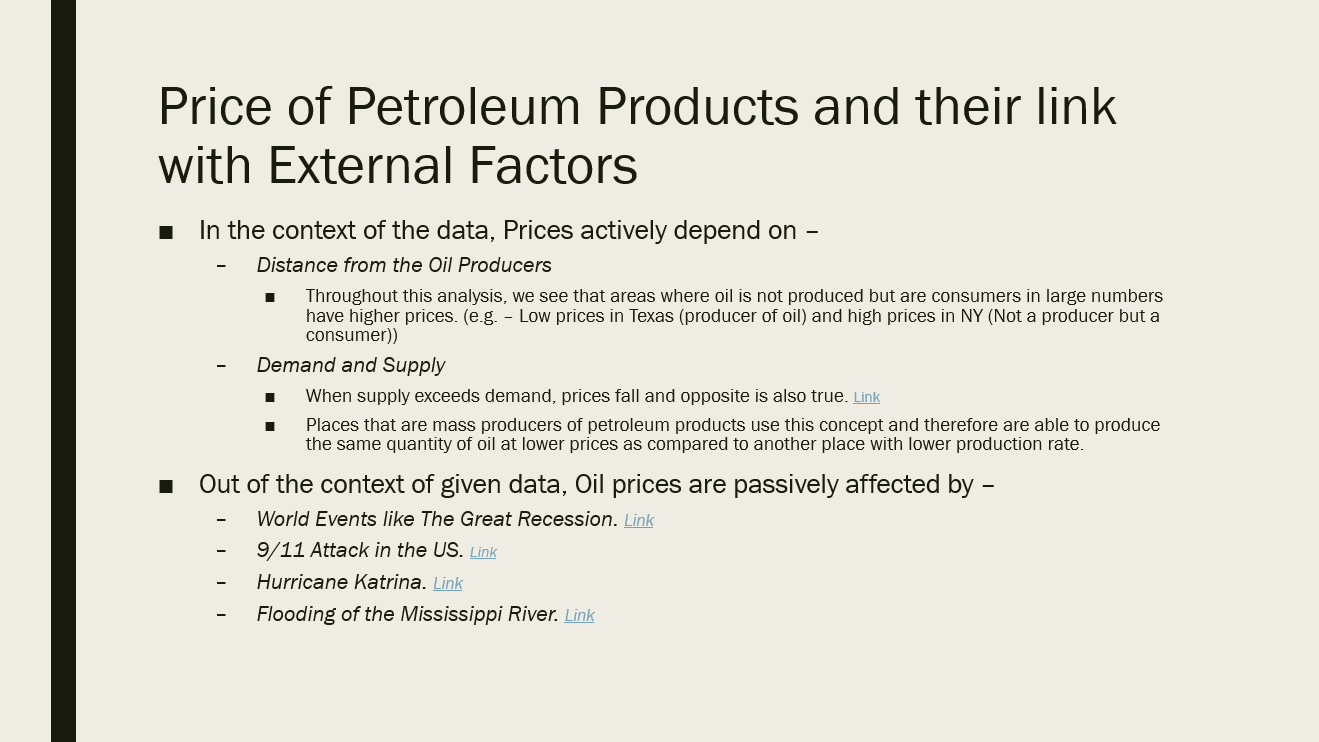

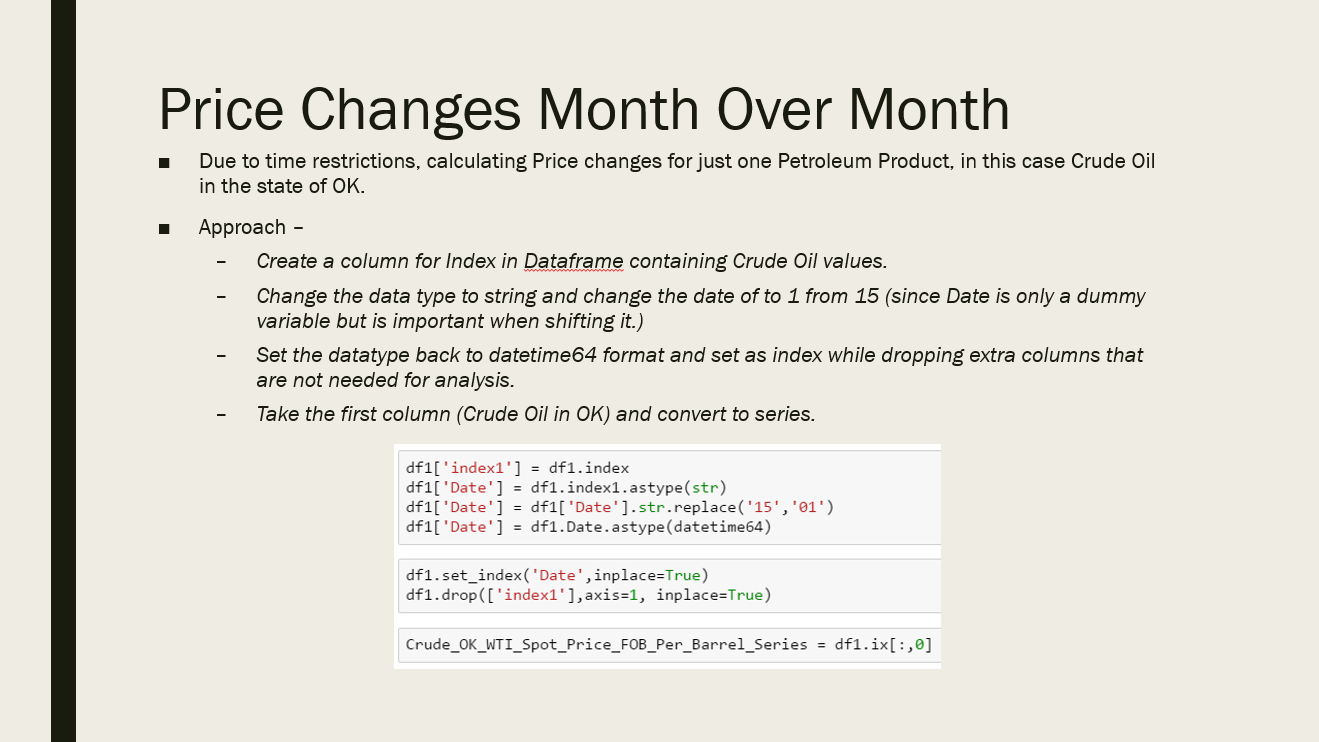

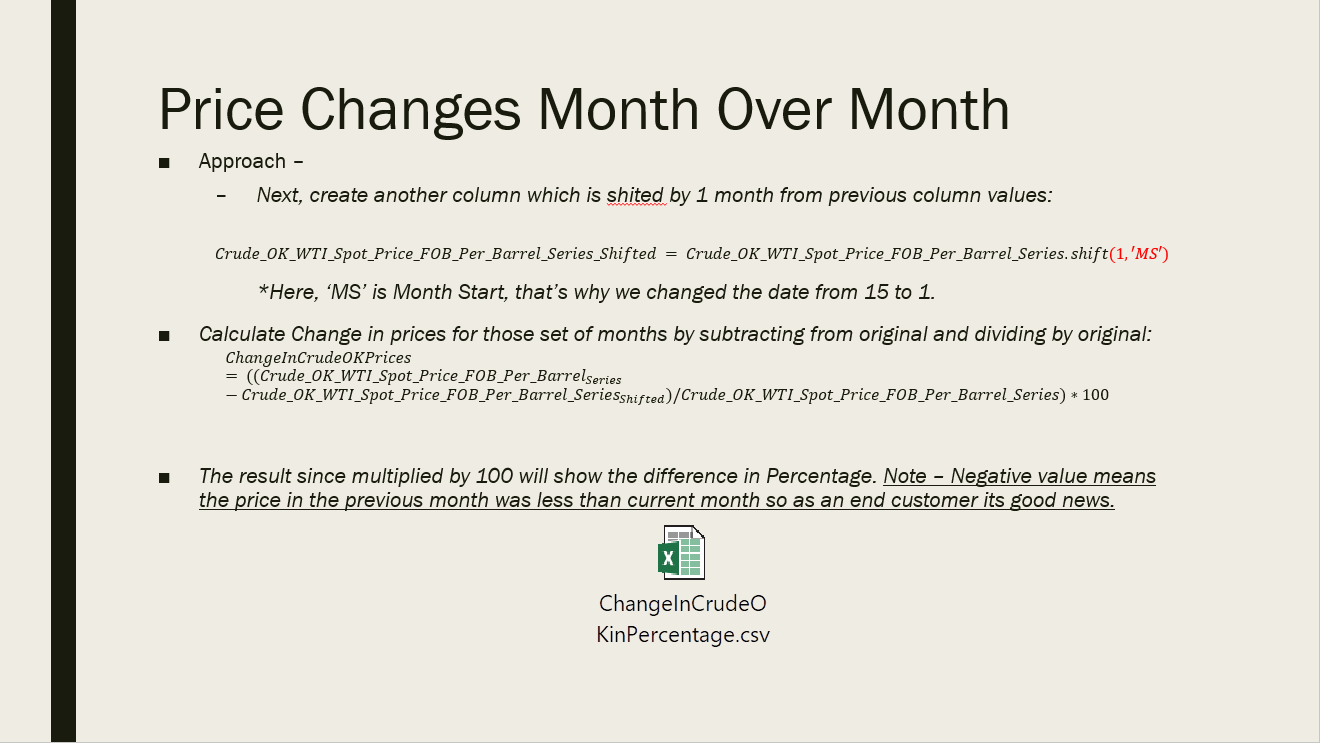

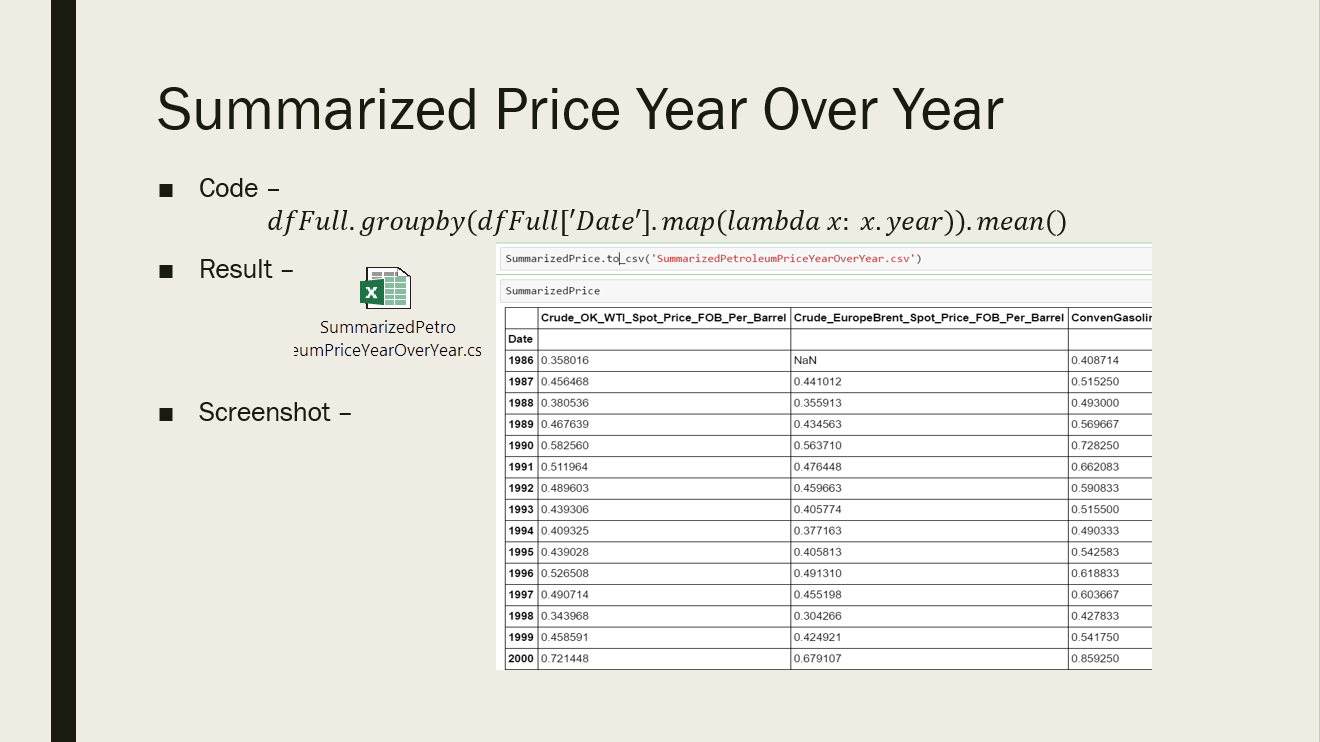

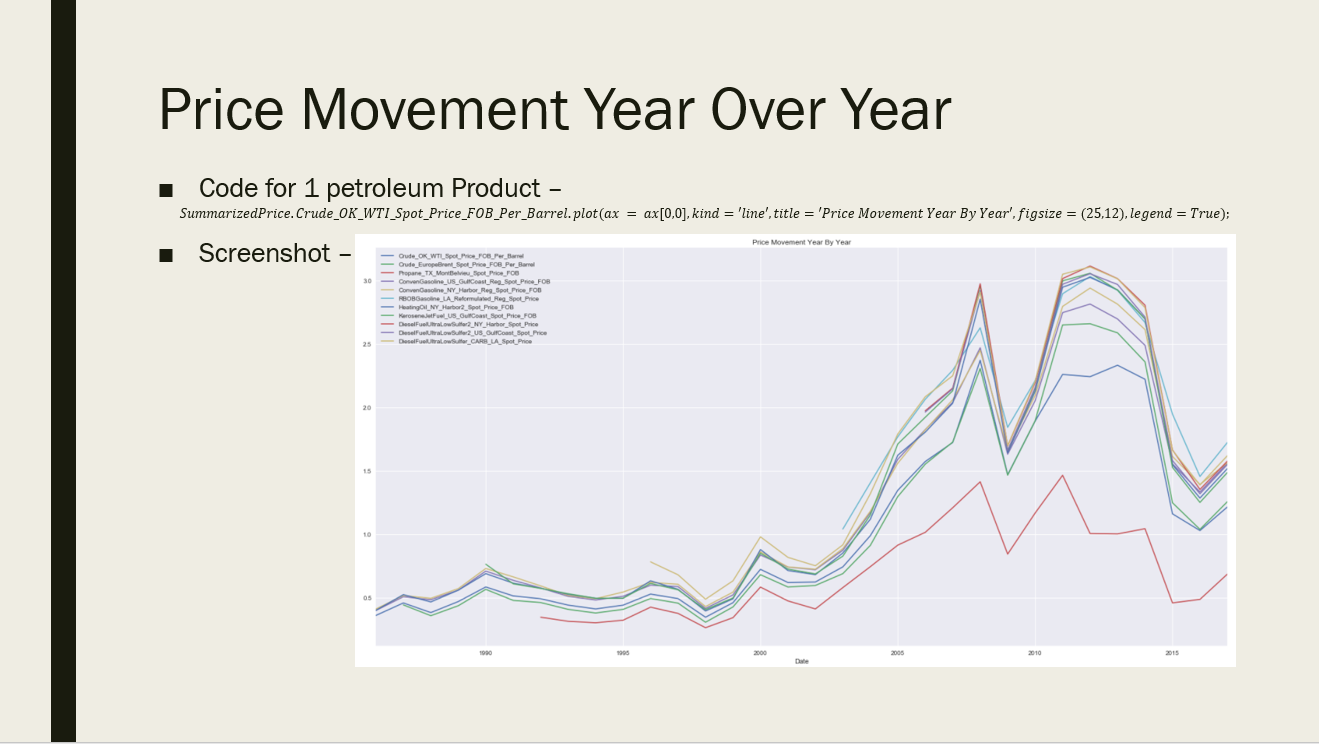

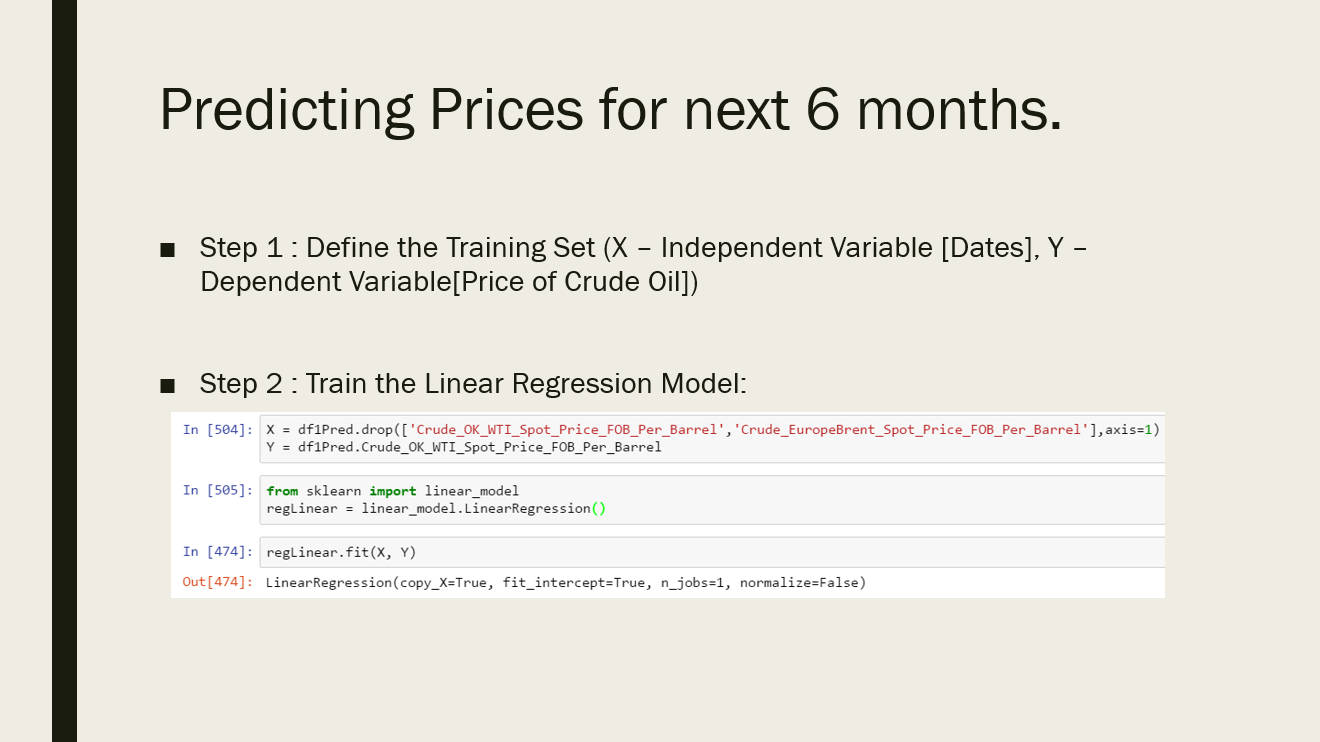

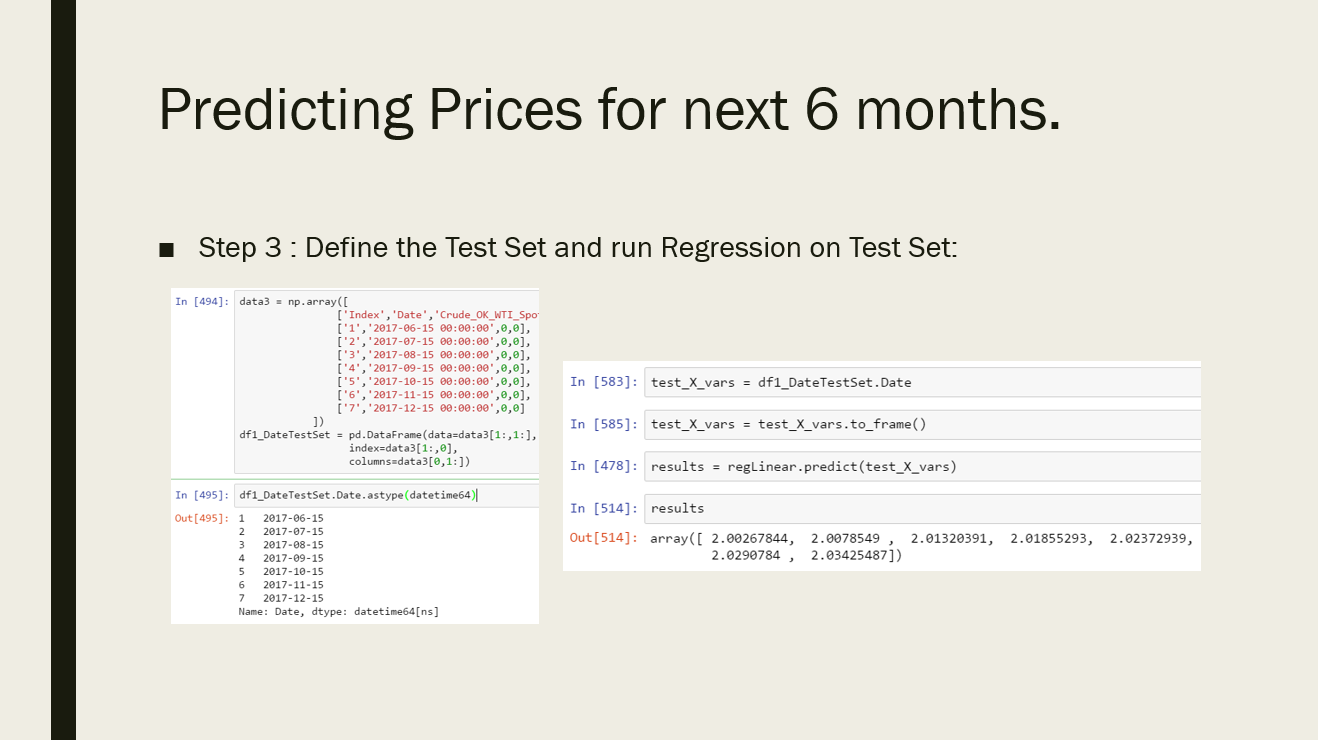

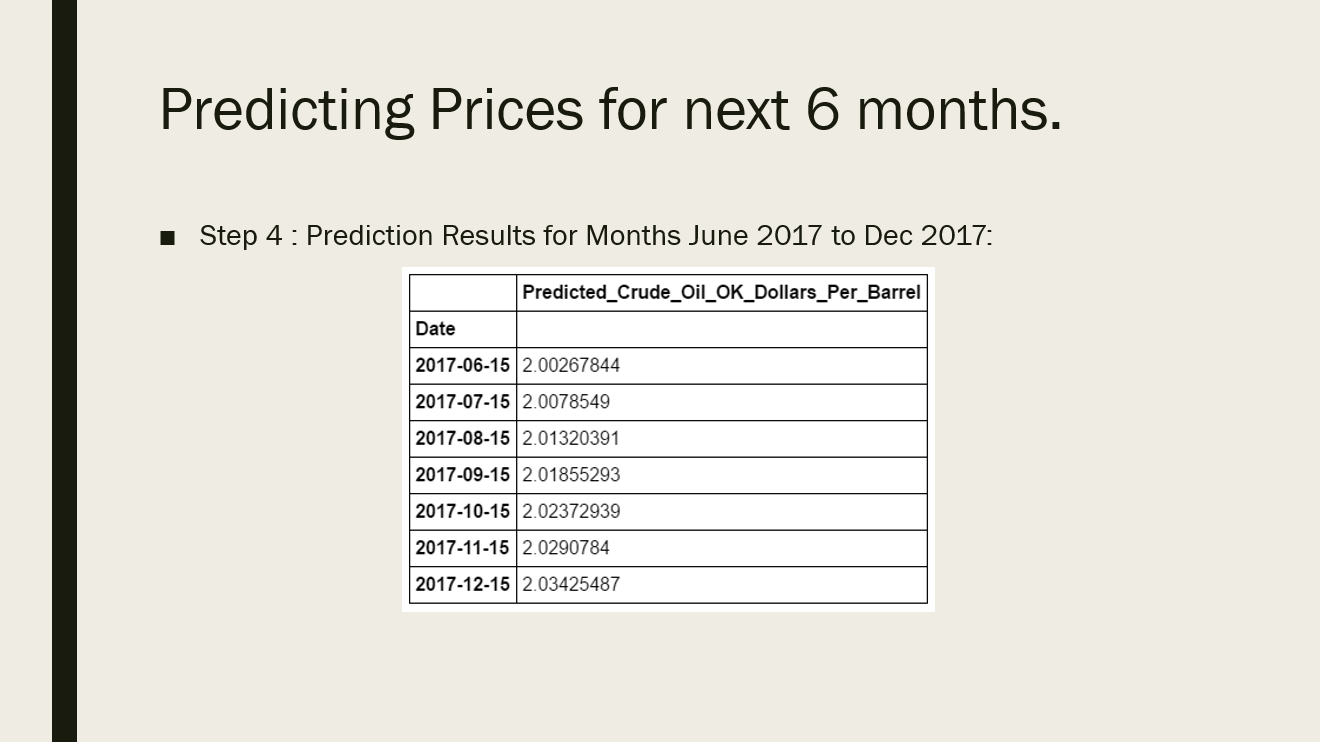

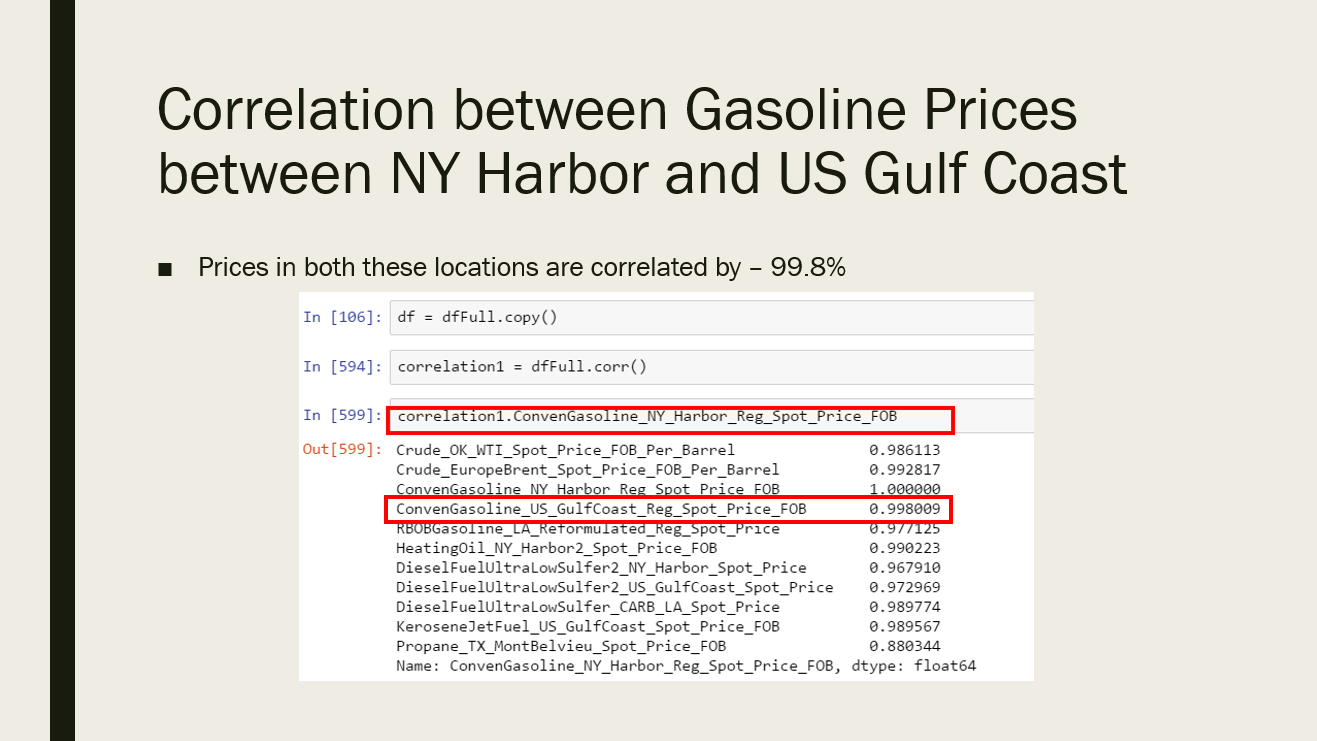

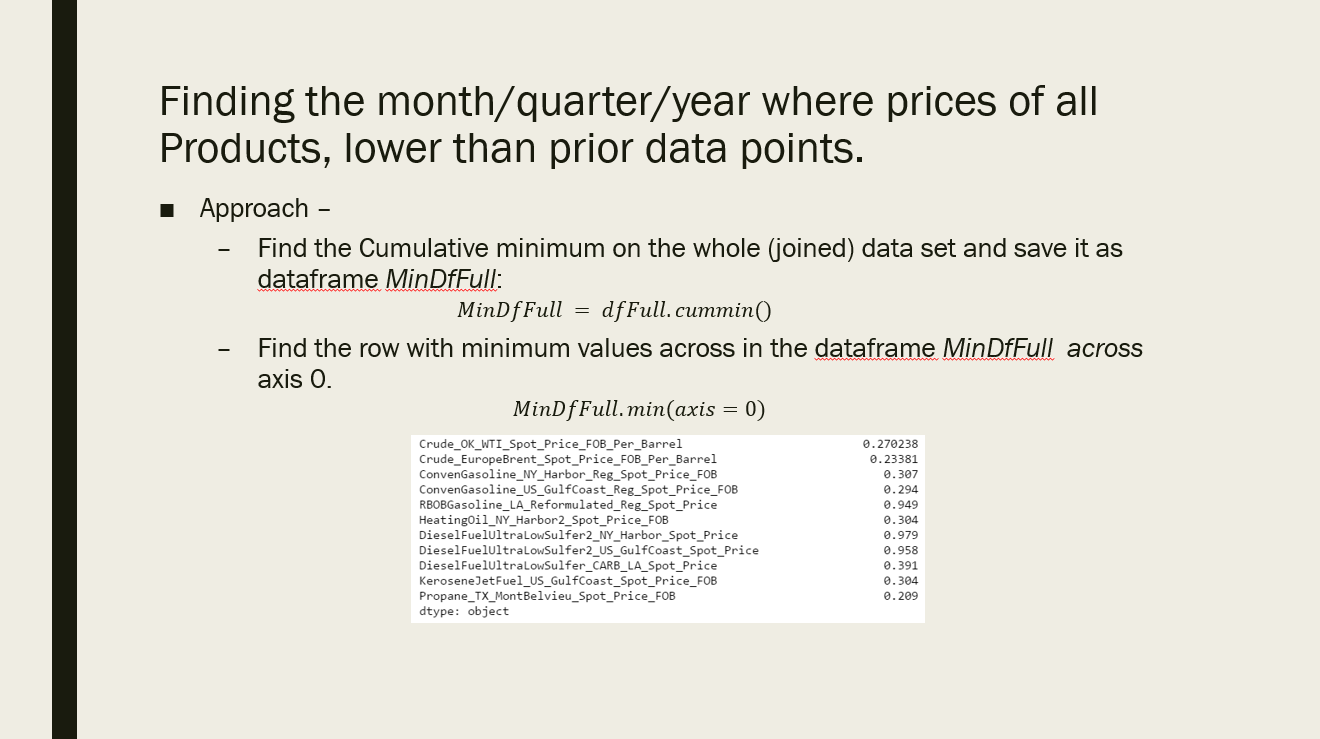

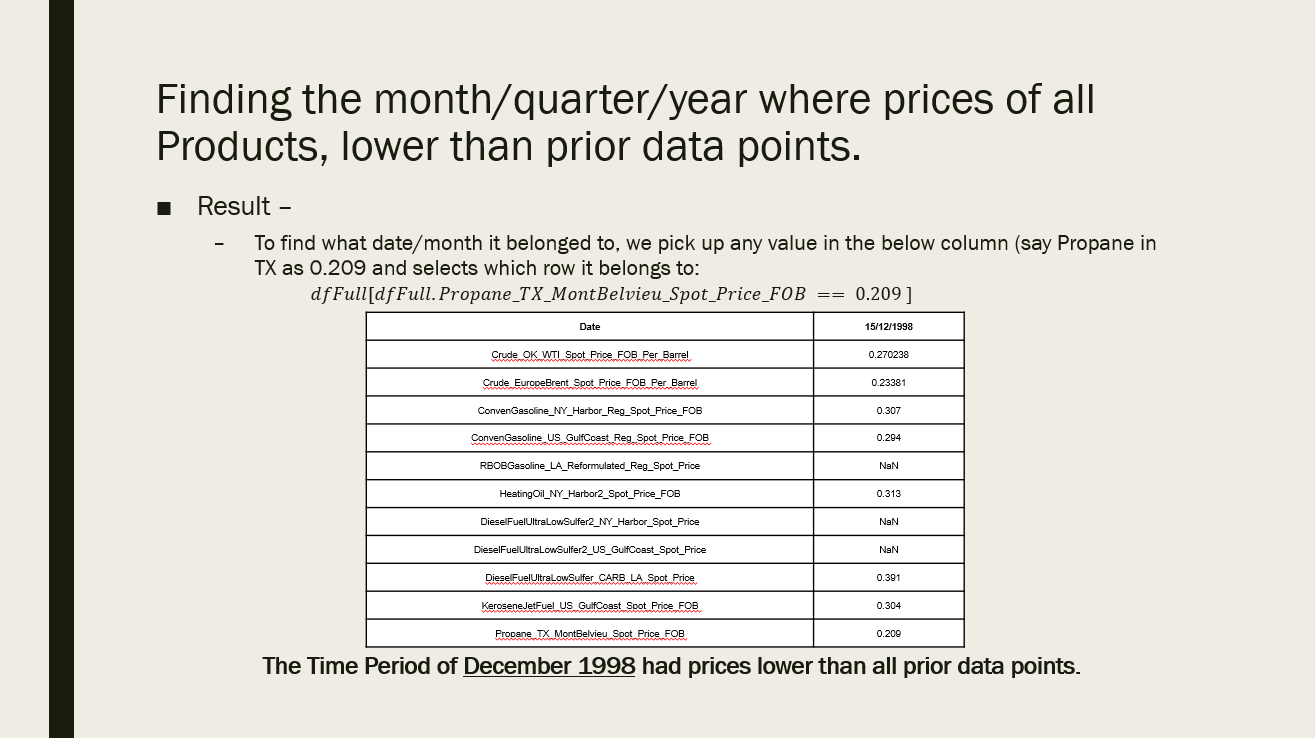

In [5]:
from IPython.display import Image
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\1.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\2.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\3.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\4.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\5.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\6.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\7.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\8.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\9.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\10.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\11.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\12.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\13.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\14.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\15.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\16.png')
Image(filename='V:\\MSIS\\Spring 2017\\Personal\\PythonSelfProject\\17.png')

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
from datetime import date, timedelta
from datetime import datetime
#import pydotplus
from sklearn.cluster import KMeans
import datetime

Populating the interactive namespace from numpy and matplotlib


In [47]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [48]:
xls = pd.ExcelFile('PET_PRI_SPT_S1_M.xls')
df1 = xls.parse('Data 1',skiprows=2)
df2 = xls.parse('Data 2',skiprows=2)
df3 = xls.parse('Data 3',skiprows=2)
df4 = xls.parse('Data 4',skiprows=2)
df5 = xls.parse('Data 5',skiprows=2)
df6 = xls.parse('Data 6',skiprows=2)
df7 = xls.parse('Data 7',skiprows=2)

In [49]:
df1.rename(columns={"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)" : "Crude_OK_WTI_Spot_Price_FOB_Per_Barrel", 
                    "Europe Brent Spot Price FOB (Dollars per Barrel)" : "Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel"},inplace=True)

df2.rename(columns={"New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)" : "ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB", 
                    "U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)" : "ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB"},inplace=True)

df3.rename(columns={"Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)" : "RBOBGasoline_LA_Reformulated_Reg_Spot_Price"},inplace=True)


df4.rename(columns={"New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)" : "HeatingOil_NY_Harbor2_Spot_Price_FOB"},inplace=True)


df5.rename(columns={"New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)" : "DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price",
                    "U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)" : "DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price",
                    "Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)" : "DieselFuelUltraLowSulfer_CARB_LA_Spot_Price"},inplace=True)

df6.rename(columns={"U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)" : "KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB"},inplace=True)

df7.rename(columns={"Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)" : "Propane_TX_MontBelvieu_Spot_Price_FOB"},inplace=True)


df1 has data in Dollars per Barrel, and others have data in Dollars per Gallon. To achieve consistency, we must convert to standard unit, in this case,<b> we convert barrels to gallons</b>.

In [50]:
df1.Crude_OK_WTI_Spot_Price_FOB_Per_Barrel = df1.Crude_OK_WTI_Spot_Price_FOB_Per_Barrel/42
df1.Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel = df1.Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel/42

All Data is now in Dollars Per Gallon, so we rename the columns to not hold any units for simplicity purpose

In [51]:
df1.rename(columns={"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)" : "Crude_OK_WTI_Spot_Price_FOB", 
                    "Europe Brent Spot Price FOB (Dollars per Barrel)" : "Crude_EuropeBrent_Spot_Price_FOB"},inplace=True)

Here we have date as a common field, so we need to use Full Outer Join since we do not want to exclude any rows from any of the above dataframes.

In [52]:
df1.head()

,Date,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel
0,1986-01-15,0.545952,NaN
1,1986-02-15,0.368095,NaN
2,1986-03-15,0.300238,NaN
3,1986-04-15,0.305714,NaN
4,1986-05-15,0.366190,NaN


In [53]:
len(df2)

372

In [54]:
df1.dtypes

Date                                           datetime64[ns]
Crude_OK_WTI_Spot_Price_FOB_Per_Barrel                float64
Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel           float64
dtype: object

In [55]:
dfFull = df1.merge(df2,how='outer',on='Date').merge(df3,how='outer',on='Date').merge(df4,how='outer', on='Date').merge(df5,how='outer',on='Date').merge(df6,how='outer',on='Date').merge(df7,how='outer',on='Date')

In [56]:
dfFull.columns

Index([                                             u'Date',
                  u'Crude_OK_WTI_Spot_Price_FOB_Per_Barrel',
             u'Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel',
             u'ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB',
          u'ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB',
             u'RBOBGasoline_LA_Reformulated_Reg_Spot_Price',
                    u'HeatingOil_NY_Harbor2_Spot_Price_FOB',
          u'DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price',
       u'DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price',
             u'DieselFuelUltraLowSulfer_CARB_LA_Spot_Price',
             u'KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB',
                   u'Propane_TX_MontBelvieu_Spot_Price_FOB'],
      dtype='object')

In [57]:
dfFull['Date1'] = dfFull.Date.astype(str)

In [58]:
dfFull.dtypes

Date                                                 datetime64[ns]
Crude_OK_WTI_Spot_Price_FOB_Per_Barrel                      float64
Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel                 float64
ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB                 float64
ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB              float64
RBOBGasoline_LA_Reformulated_Reg_Spot_Price                 float64
HeatingOil_NY_Harbor2_Spot_Price_FOB                        float64
DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price              float64
DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price           float64
DieselFuelUltraLowSulfer_CARB_LA_Spot_Price                 float64
KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB                 float64
Propane_TX_MontBelvieu_Spot_Price_FOB                       float64
Date1                                                        object
dtype: object

In [59]:
dfFull.Date1.replace('-','/')

0      1986-01-15
1      1986-02-15
2      1986-03-15
3      1986-04-15
4      1986-05-15
5      1986-06-15
6      1986-07-15
7      1986-08-15
8      1986-09-15
9      1986-10-15
10     1986-11-15
11     1986-12-15
12     1987-01-15
13     1987-02-15
14     1987-03-15
15     1987-04-15
16     1987-05-15
17     1987-06-15
18     1987-07-15
19     1987-08-15
20     1987-09-15
21     1987-10-15
22     1987-11-15
23     1987-12-15
24     1988-01-15
25     1988-02-15
26     1988-03-15
27     1988-04-15
28     1988-05-15
29     1988-06-15
          ...    
347    2014-12-15
348    2015-01-15
349    2015-02-15
350    2015-03-15
351    2015-04-15
352    2015-05-15
353    2015-06-15
354    2015-07-15
355    2015-08-15
356    2015-09-15
357    2015-10-15
358    2015-11-15
359    2015-12-15
360    2016-01-15
361    2016-02-15
362    2016-03-15
363    2016-04-15
364    2016-05-15
365    2016-06-15
366    2016-07-15
367    2016-08-15
368    2016-09-15
369    2016-10-15
370    2016-11-15
371    201

In [30]:
dfFull.to_csv("AllPetroleumPrices.csv")

In [897]:
df1.set_index('Date',inplace=True)
Trend_Crude_OK = df1.Crude_OK_WTI_Spot_Price_FOB_Per_Barrel
Trend_Crude_OK[Trend_Crude_OK == Trend_Crude_OK.max()]
# %pylab inline
# Trend_Crude_OK.plot(figsize=(20,10))
Trend_Crude_OK_MAX = Trend_Crude_OK[Trend_Crude_OK == Trend_Crude_OK.max()]
Trend_Crude_OK_MEAN = Trend_Crude_OK.mean()

Date
2008-06-15    3.187619
Name: Crude_OK_WTI_Spot_Price_FOB_Per_Barrel, dtype: float64

In [898]:
Trend_Crude_Europe = df1.Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel
Trend_Crude_Europe[Trend_Crude_Europe == Trend_Crude_Europe.max()]
# %pylab inline
# Trend_Crude_Europe.plot(figsize=(20,10))
Trend_Crude_Europe_MAX = Trend_Crude_Europe[Trend_Crude_Europe == Trend_Crude_Europe.max()]
Trend_Crude_Europe_MEAN = Trend_Crude_Europe.mean()

Date
2008-07-15    3.16
Name: Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel, dtype: float64

In [899]:
df2.set_index('Date',inplace=True)
Trend_Gaso_NYHarbor = df2.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB
Trend_Gaso_NYHarbor[Trend_Gaso_NYHarbor == Trend_Gaso_NYHarbor.max()]
# %pylab inline
# Trend_Gaso_NYHarbor.plot(figsize=(20,10))
Trend_Gaso_NYHarbor_MAX = Trend_Gaso_NYHarbor[Trend_Gaso_NYHarbor == Trend_Gaso_NYHarbor.max()]
Trend_Gaso_NYHarbor_MEAN = Trend_Gaso_NYHarbor.mean()

Date
2008-06-15    3.292
Name: ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB, dtype: float64

In [900]:
Trend_Gaso_GulfCoast = df2.ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB
Trend_Gaso_GulfCoast[Trend_Gaso_GulfCoast == Trend_Gaso_GulfCoast.max()]
# %pylab inline
# Trend_Gaso_GulfCoast.plot(figsize=(20,10))
Trend_Gaso_GulfCoast_MAX = Trend_Gaso_GulfCoast[Trend_Gaso_GulfCoast == Trend_Gaso_GulfCoast.max()]
Trend_Gaso_GulfCoast_MEAN = Trend_Gaso_GulfCoast.mean()

Date
2008-06-15    3.284
Name: ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB, dtype: float64

In [901]:
df3.set_index('Date',inplace=True)
Trend_RBOB_Gaso_LA = df3.RBOBGasoline_LA_Reformulated_Reg_Spot_Price
Trend_RBOB_Gaso_LA[Trend_RBOB_Gaso_LA == Trend_RBOB_Gaso_LA.max()]
# %pylab inline
# Trend_RBOB_Gaso_LA.plot(figsize=(20,10))
Trend_RBOB_Gaso_LA_MAX = Trend_RBOB_Gaso_LA[Trend_RBOB_Gaso_LA == Trend_RBOB_Gaso_LA.max()]
Trend_RBOB_Gaso_LA_MEAN = Trend_RBOB_Gaso_LA.mean()

Date
2008-06-15    3.694
Name: RBOBGasoline_LA_Reformulated_Reg_Spot_Price, dtype: float64

In [902]:
df4.set_index('Date',inplace=True)
Trend_HeatingOil_NYHarbor = df4.HeatingOil_NY_Harbor2_Spot_Price_FOB
Trend_HeatingOil_NYHarbor[Trend_HeatingOil_NYHarbor == Trend_HeatingOil_NYHarbor.max()]
# %pylab inline
# Trend_HeatingOil_NYHarbor.plot(figsize=(20,10))

Trend_HeatingOil_NYHarbor_MAX = Trend_HeatingOil_NYHarbor[Trend_HeatingOil_NYHarbor == Trend_HeatingOil_NYHarbor.max()]
Trend_HeatingOil_NYHarbor_MEAN = Trend_HeatingOil_NYHarbor.mean()

Date
2008-06-15    3.801
Name: HeatingOil_NY_Harbor2_Spot_Price_FOB, dtype: float64

In [903]:
df5.set_index('Date',inplace=True)
Trend_DFuel_LowSulfer_NYHarbor = df5.DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price
Trend_DFuel_LowSulfer_NYHarbor[Trend_DFuel_LowSulfer_NYHarbor == Trend_DFuel_LowSulfer_NYHarbor.max()]
# %pylab inline
# Trend_DFuel_LowSulfer_NYHarbor.plot(figsize=(20,10))

Trend_DFuel_LowSulfer_NYHarbor_MAX = Trend_DFuel_LowSulfer_NYHarbor[Trend_DFuel_LowSulfer_NYHarbor == Trend_DFuel_LowSulfer_NYHarbor.max()]
Trend_DFuel_LowSulfer_NYHarbor_MEAN = Trend_DFuel_LowSulfer_NYHarbor.mean()

Date
2008-06-15    3.887
Name: DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price, dtype: float64

In [904]:
Trend_DFuel_LowSulfer_GulfCoast = df5.DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price
Trend_DFuel_LowSulfer_GulfCoast[Trend_DFuel_LowSulfer_GulfCoast == Trend_DFuel_LowSulfer_GulfCoast.max()]
# %pylab inline
# Trend_DFuel_LowSulfer_GulfCoast.plot(figsize=(20,10))

Trend_DFuel_LowSulfer_GulfCoast_MAX = Trend_DFuel_LowSulfer_GulfCoast[Trend_DFuel_LowSulfer_GulfCoast == Trend_DFuel_LowSulfer_GulfCoast.max()]
Trend_DFuel_LowSulfer_GulfCoast_MEAN = Trend_DFuel_LowSulfer_GulfCoast.mean()

Date
2008-06-15    3.851
Name: DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price, dtype: float64

In [905]:
Trend_DFuel_LowSulfer_CARB_LA = df5.DieselFuelUltraLowSulfer_CARB_LA_Spot_Price
Trend_DFuel_LowSulfer_CARB_LA[Trend_DFuel_LowSulfer_CARB_LA == Trend_DFuel_LowSulfer_CARB_LA.max()]
# %pylab inline
# Trend_DFuel_LowSulfer_CARB_LA.plot(figsize=(20,10))

Trend_DFuel_LowSulfer_CARB_LA_MAX = Trend_DFuel_LowSulfer_CARB_LA[Trend_DFuel_LowSulfer_CARB_LA == Trend_DFuel_LowSulfer_CARB_LA.max()]
Trend_DFuel_LowSulfer_CARB_LA_MEAN = Trend_DFuel_LowSulfer_CARB_LA.mean()

Date
2008-06-15    3.894
Name: DieselFuelUltraLowSulfer_CARB_LA_Spot_Price, dtype: float64

In [906]:
df6.set_index('Date',inplace=True)
Trend_Kerosene_JetFuel_GulfCoast = df6.KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB
Trend_Kerosene_JetFuel_GulfCoast[Trend_Kerosene_JetFuel_GulfCoast == Trend_Kerosene_JetFuel_GulfCoast.max()]
# %pylab inline
# Trend_Kerosene_JetFuel_GulfCoast.plot(figsize=(20,10))

Trend_Kerosene_JetFuel_GulfCoast_MAX = Trend_Kerosene_JetFuel_GulfCoast[Trend_Kerosene_JetFuel_GulfCoast == Trend_Kerosene_JetFuel_GulfCoast.max()]
Trend_Kerosene_JetFuel_GulfCoast_MEAN = Trend_Kerosene_JetFuel_GulfCoast.mean()

Date
2008-07-15    3.886
Name: KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB, dtype: float64

In [907]:
df7.set_index('Date',inplace=True)
Trend_Propane_TX_MontBelvieu = df7.Propane_TX_MontBelvieu_Spot_Price_FOB
Trend_Propane_TX_MontBelvieu[Trend_Propane_TX_MontBelvieu == Trend_Propane_TX_MontBelvieu.max()]
# %pylab inline
# Trend_Propane_TX_MontBelvieu.plot(figsize=(20,10))

Trend_Propane_TX_MontBelvieu_MAX = Trend_Propane_TX_MontBelvieu[Trend_Propane_TX_MontBelvieu == Trend_Propane_TX_MontBelvieu.max()]
Trend_Propane_TX_MontBelvieu_MEAN = Trend_Propane_TX_MontBelvieu.mean()

Date
2008-07-15    1.862
Name: Propane_TX_MontBelvieu_Spot_Price_FOB, dtype: float64

In [908]:
Trend_Crude_Europe_MAX.index[0]

Timestamp('2008-07-15 00:00:00')

In [909]:
data = np.array([
                ['Index','Petroleum_Product','Date','Max_Price'],
                ['1','Trend_Crude_Europe',datetime.datetime.date((Trend_Crude_Europe_MAX.index[0])),float(Trend_Crude_Europe_MAX.values[0])],
                ['2','Trend_Crude_OK',datetime.datetime.date((Trend_Crude_OK_MAX.index[0])),float(Trend_Crude_OK_MAX.values[0])],
                ['3','Trend_DFuel_LowSulfer_CARB_LA',datetime.datetime.date((Trend_DFuel_LowSulfer_CARB_LA_MAX.index[0])),float(Trend_DFuel_LowSulfer_CARB_LA_MAX.values[0])],
                ['4','Trend_DFuel_LowSulfer_GulfCoast',datetime.datetime.date((Trend_DFuel_LowSulfer_GulfCoast_MAX.index[0])),float(Trend_DFuel_LowSulfer_GulfCoast_MAX.values[0])],
                ['5','Trend_DFuel_LowSulfer_NYHarbor',datetime.datetime.date((Trend_DFuel_LowSulfer_NYHarbor_MAX.index[0])),float(Trend_DFuel_LowSulfer_NYHarbor_MAX.values[0])],
                ['6','Trend_Gaso_GulfCoast',datetime.datetime.date((Trend_Gaso_GulfCoast_MAX.index[0])),float(Trend_Gaso_GulfCoast_MAX.values[0])],
                ['7','Trend_Gaso_NYHarbor',datetime.datetime.date((Trend_Gaso_NYHarbor_MAX.index[0])),float(Trend_Gaso_NYHarbor_MAX.values[0])],
                ['8','Trend_HeatingOil_NYHarbor',datetime.datetime.date((Trend_HeatingOil_NYHarbor_MAX.index[0])),float(Trend_HeatingOil_NYHarbor_MAX.values[0])],
                ['9','Trend_Kerosene_JetFuel_GulfCoast',datetime.datetime.date((Trend_Kerosene_JetFuel_GulfCoast_MAX.index[0])),float(Trend_Kerosene_JetFuel_GulfCoast_MAX.values[0])],
                ['10','Trend_Propane_TX_MontBelvieu',datetime.datetime.date((Trend_Propane_TX_MontBelvieu_MAX.index[0])),float(Trend_Propane_TX_MontBelvieu_MAX.values[0])],
                ['11','Trend_RBOB_Gaso_LA',datetime.datetime.date((Trend_RBOB_Gaso_LA_MAX.index[0])),float(Trend_RBOB_Gaso_LA_MAX.values[0])]
            ])

df_new = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

In [910]:
Trend_Crude_Europe_MEAN

1.0702216066481995

In [911]:
data2 = np.array([
                ['Index','Petroleum_Product','MEAN_Price'],
                ['1','Trend_Crude_Europe',float(Trend_Crude_Europe_MEAN)],
                ['2','Trend_Crude_OK',float(Trend_Crude_OK_MEAN)],
                ['3','Trend_DFuel_LowSulfer_CARB_LA',float(Trend_DFuel_LowSulfer_CARB_LA_MEAN)],
                ['4','Trend_DFuel_LowSulfer_GulfCoast',float(Trend_DFuel_LowSulfer_GulfCoast_MEAN)],
                ['5','Trend_DFuel_LowSulfer_NYHarbor',float(Trend_DFuel_LowSulfer_NYHarbor_MEAN)],
                ['6','Trend_Gaso_GulfCoast',float(Trend_Gaso_GulfCoast_MEAN)],
                ['7','Trend_Gaso_NYHarbor',float(Trend_Gaso_NYHarbor_MEAN)],
                ['8','Trend_HeatingOil_NYHarbor',float(Trend_HeatingOil_NYHarbor_MEAN)],
                ['9','Trend_Kerosene_JetFuel_GulfCoast',float(Trend_Kerosene_JetFuel_GulfCoast_MEAN)],
                ['10','Trend_Propane_TX_MontBelvieu',float(Trend_Propane_TX_MontBelvieu_MEAN)],
                ['11','Trend_RBOB_Gaso_LA',float(Trend_RBOB_Gaso_LA_MEAN)]
            ])
df_new_mean = pd.DataFrame(data=data2[1:,1:],
                  index=data2[1:,0],
                  columns=data2[0,1:])

In [912]:
df_new.sort_values('Max_Price',ascending=True)

,Petroleum_Product,Date,Max_Price
10,Trend_Propane_TX_MontBelvieu,2008-07-15,1.862
1,Trend_Crude_Europe,2008-07-15,3.16
2,Trend_Crude_OK,2008-06-15,3.18762
6,Trend_Gaso_GulfCoast,2008-06-15,3.284
7,Trend_Gaso_NYHarbor,2008-06-15,3.292
11,Trend_RBOB_Gaso_LA,2008-06-15,3.694
8,Trend_HeatingOil_NYHarbor,2008-06-15,3.801
4,Trend_DFuel_LowSulfer_GulfCoast,2008-06-15,3.851
9,Trend_Kerosene_JetFuel_GulfCoast,2008-07-15,3.886
5,Trend_DFuel_LowSulfer_NYHarbor,2008-06-15,3.887


In [913]:
df_new_mean.sort_values('MEAN_Price',axis=0, ascending=True)

,Petroleum_Product,MEAN_Price
10,Trend_Propane_TX_MontBelvieu,0.704193333333
2,Trend_Crude_OK,1.02347353796
1,Trend_Crude_Europe,1.07022160665
6,Trend_Gaso_GulfCoast,1.21020430108
7,Trend_Gaso_NYHarbor,1.23800268817
8,Trend_HeatingOil_NYHarbor,1.24526612903
9,Trend_Kerosene_JetFuel_GulfCoast,1.36800920245
3,Trend_DFuel_LowSulfer_CARB_LA,1.68944488189
11,Trend_RBOB_Gaso_LA,2.174375
4,Trend_DFuel_LowSulfer_GulfCoast,2.29715151515


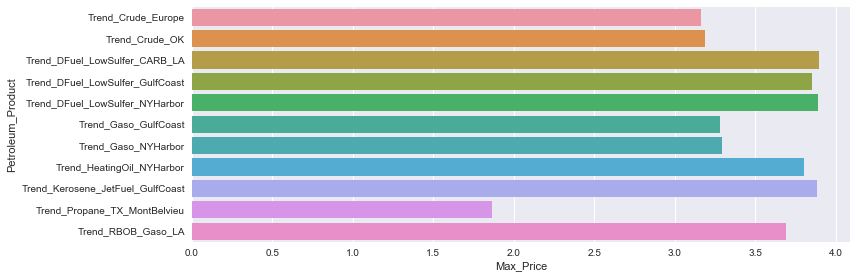

In [914]:
sns.factorplot(x='Max_Price',y='Petroleum_Product',data=df_new,kind='bar',aspect=3)

In [915]:
#Help for Insights
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Top_5_US_Oil_States.svg/750px-Top_5_US_Oil_States.svg.png")

In [916]:
dfFull.head(5)

,Date,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB,ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB,RBOBGasoline_LA_Reformulated_Reg_Spot_Price,HeatingOil_NY_Harbor2_Spot_Price_FOB,DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price,DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price,DieselFuelUltraLowSulfer_CARB_LA_Spot_Price,KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB,Propane_TX_MontBelvieu_Spot_Price_FOB
0,1986-01-15,0.545952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-02-15,0.368095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-03-15,0.300238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-04-15,0.305714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-05-15,0.366190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [917]:
SummarizedPrice = dfFull.groupby(dfFull['Date'].map(lambda x: x.year)).mean()

In [918]:
SummarizedPrice.to_csv('SummarizedPetroleumPriceYearOverYear.csv')

In [919]:
SummarizedPrice

,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB,ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB,RBOBGasoline_LA_Reformulated_Reg_Spot_Price,HeatingOil_NY_Harbor2_Spot_Price_FOB,DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price,DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price,DieselFuelUltraLowSulfer_CARB_LA_Spot_Price,KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB,Propane_TX_MontBelvieu_Spot_Price_FOB
Date,,,,,,,,,,,
1986,0.358016,NaN,0.408714,0.397143,NaN,0.398143,NaN,NaN,NaN,NaN,NaN
1987,0.456468,0.441012,0.515250,0.505333,NaN,0.522000,NaN,NaN,NaN,NaN,NaN
1988,0.380536,0.355913,0.493000,0.481667,NaN,0.464500,NaN,NaN,NaN,NaN,NaN
1989,0.467639,0.434563,0.569667,0.557417,NaN,0.557333,NaN,NaN,NaN,NaN,NaN
1990,0.582560,0.563710,0.728250,0.707500,NaN,0.687833,NaN,NaN,NaN,0.761889,NaN
1991,0.511964,0.476448,0.662083,0.634917,NaN,0.612500,NaN,NaN,NaN,0.607167,NaN
1992,0.489603,0.459663,0.590833,0.574667,NaN,0.572333,NaN,NaN,NaN,0.571083,0.344000
1993,0.439306,0.405774,0.515500,0.508583,NaN,0.524750,NaN,NaN,NaN,0.529333,0.311667
1994,0.409325,0.377163,0.490333,0.479417,NaN,0.494000,NaN,NaN,NaN,0.493333,0.300167


In [920]:
SummarizedPrice.dtypes

Crude_OK_WTI_Spot_Price_FOB_Per_Barrel               float64
Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel          float64
ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB          float64
ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB       float64
RBOBGasoline_LA_Reformulated_Reg_Spot_Price          float64
HeatingOil_NY_Harbor2_Spot_Price_FOB                 float64
DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price       float64
DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price    float64
DieselFuelUltraLowSulfer_CARB_LA_Spot_Price          float64
KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB          float64
Propane_TX_MontBelvieu_Spot_Price_FOB                float64
dtype: object

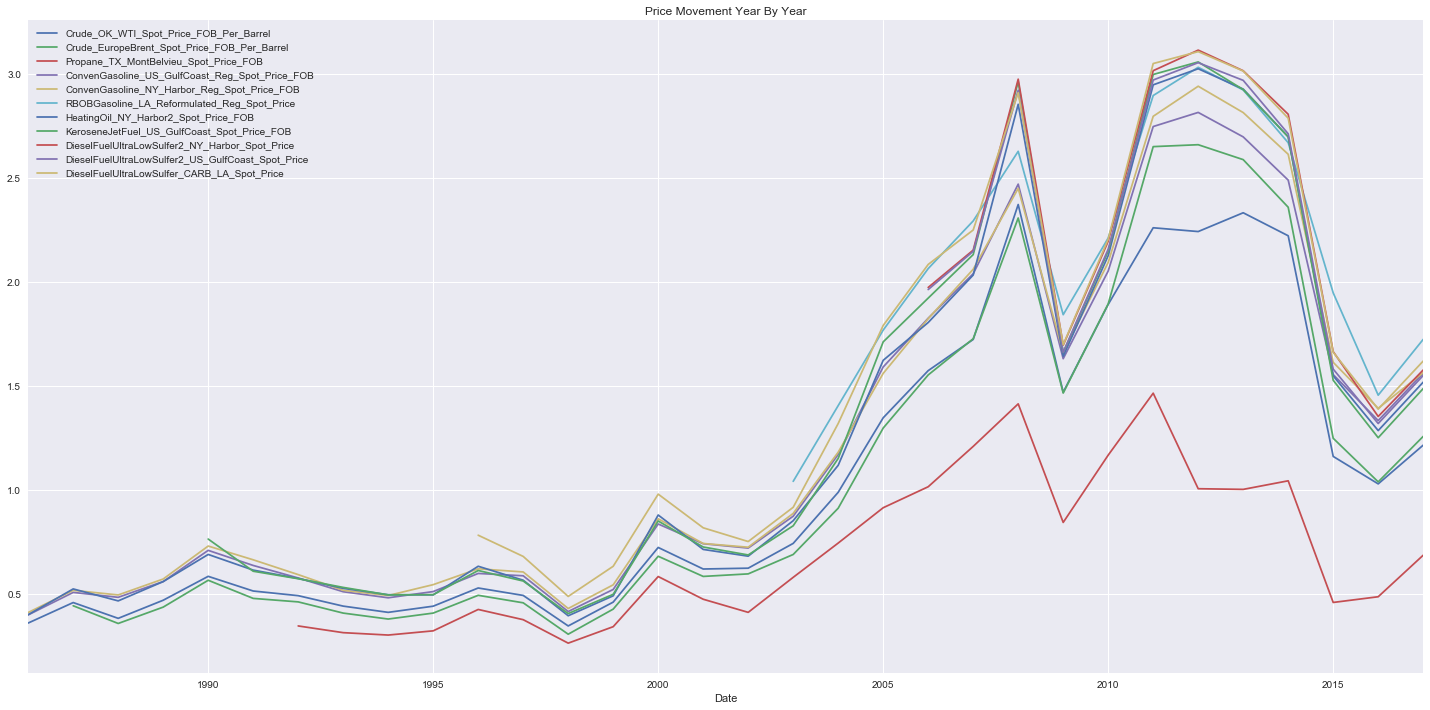

In [921]:
fig, ax = plt.subplots(1, 1,squeeze=False);
SummarizedPrice.Crude_OK_WTI_Spot_Price_FOB_Per_Barrel.plot(ax = ax[0,0],kind='line', title='Price Movement Year By Year', figsize=(25,12),legend=True);
SummarizedPrice.Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.Propane_TX_MontBelvieu_Spot_Price_FOB.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.RBOBGasoline_LA_Reformulated_Reg_Spot_Price.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.HeatingOil_NY_Harbor2_Spot_Price_FOB.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);
SummarizedPrice.DieselFuelUltraLowSulfer_CARB_LA_Spot_Price.plot(ax = ax[0,0],kind='line', figsize=(25,12),legend=True);

In [922]:
dfFull.groupby(dfFull['Date'].map(lambda x: x.month)).mean()

,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB,ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB,RBOBGasoline_LA_Reformulated_Reg_Spot_Price,HeatingOil_NY_Harbor2_Spot_Price_FOB,DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price,DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price,DieselFuelUltraLowSulfer_CARB_LA_Spot_Price,KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB,Propane_TX_MontBelvieu_Spot_Price_FOB
Date,,,,,,,,,,,
1,0.969375,1.015976,1.146419,1.117516,1.927000,1.221484,2.182182,2.120455,1.576000,1.314111,0.71380
2,0.970060,1.039873,1.175452,1.155968,2.128286,1.236387,2.277455,2.214273,1.657381,1.336593,0.71420
3,1.006458,1.071921,1.239097,1.240452,2.260786,1.248742,2.334364,2.286818,1.708476,1.356259,0.68852
4,1.036310,1.098675,1.317290,1.309903,2.383143,1.269871,2.388727,2.354000,1.734000,1.366107,0.69860
5,1.046749,1.086682,1.333774,1.320355,2.408357,1.263129,2.388091,2.348364,1.716455,1.367036,0.69616
6,1.054731,1.087286,1.280839,1.265323,2.322571,1.233774,2.456545,2.422364,1.723190,1.373000,0.67828
7,1.063725,1.103873,1.279806,1.261613,2.313571,1.237387,2.458000,2.428545,1.723143,1.386778,0.68924
8,1.060077,1.105556,1.291065,1.267903,2.250786,1.254226,2.427000,2.400273,1.747571,1.410111,0.70780
9,1.055177,1.096278,1.277323,1.247581,2.190357,1.264484,2.370182,2.341091,1.735857,1.436333,0.73248


In [923]:
df = dfFull.copy()

In [924]:
correlation1 = dfFull.corr()

In [925]:
correlation1.Propane_TX_MontBelvieu_Spot_Price_FOB

Crude_OK_WTI_Spot_Price_FOB_Per_Barrel               0.919911
Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel          0.893920
ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB          0.880344
ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB       0.891205
RBOBGasoline_LA_Reformulated_Reg_Spot_Price          0.699715
HeatingOil_NY_Harbor2_Spot_Price_FOB                 0.899060
DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price       0.757820
DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price    0.769399
DieselFuelUltraLowSulfer_CARB_LA_Spot_Price          0.880515
KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB          0.907731
Propane_TX_MontBelvieu_Spot_Price_FOB                1.000000
Name: Propane_TX_MontBelvieu_Spot_Price_FOB, dtype: float64

In [926]:
correlation1.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB

Crude_OK_WTI_Spot_Price_FOB_Per_Barrel               0.986113
Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel          0.992817
ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB          1.000000
ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB       0.998009
RBOBGasoline_LA_Reformulated_Reg_Spot_Price          0.977125
HeatingOil_NY_Harbor2_Spot_Price_FOB                 0.990223
DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price       0.967910
DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price    0.972969
DieselFuelUltraLowSulfer_CARB_LA_Spot_Price          0.989774
KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB          0.989567
Propane_TX_MontBelvieu_Spot_Price_FOB                0.880344
Name: ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB, dtype: float64

In [927]:
correlation1[correlation1.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB == correlation1.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB.min()]

,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB,ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB,RBOBGasoline_LA_Reformulated_Reg_Spot_Price,HeatingOil_NY_Harbor2_Spot_Price_FOB,DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price,DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price,DieselFuelUltraLowSulfer_CARB_LA_Spot_Price,KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB,Propane_TX_MontBelvieu_Spot_Price_FOB
Propane_TX_MontBelvieu_Spot_Price_FOB,0.919911,0.89392,0.880344,0.891205,0.699715,0.89906,0.75782,0.769399,0.880515,0.907731,1.0


In [928]:
correlation1[correlation1.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB == correlation1.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB.min()]

,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB,ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB,RBOBGasoline_LA_Reformulated_Reg_Spot_Price,HeatingOil_NY_Harbor2_Spot_Price_FOB,DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price,DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price,DieselFuelUltraLowSulfer_CARB_LA_Spot_Price,KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB,Propane_TX_MontBelvieu_Spot_Price_FOB
Propane_TX_MontBelvieu_Spot_Price_FOB,0.919911,0.89392,0.880344,0.891205,0.699715,0.89906,0.75782,0.769399,0.880515,0.907731,1.0


In [929]:
df1['index1'] = df1.index
df1['Date'] = df1.index1.astype(str)
df1['Date'] = df1['Date'].str.replace('15','01')
df1['Date'] = df1.Date.astype(datetime64)

In [930]:
df1.set_index('Date',inplace=True)
df1.drop(['index1'],axis=1, inplace=True)

In [931]:
Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series = df1.ix[:,0]

In [932]:
Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series_Shifted = Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series.shift(1,'MS')

In [933]:
Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series_Shifted.head()

Date
1986-02-01    0.545952
1986-03-01    0.368095
1986-04-01    0.300238
1986-05-01    0.305714
1986-06-01    0.366190
Name: Crude_OK_WTI_Spot_Price_FOB_Per_Barrel, dtype: float64

In [934]:
ChangeInCrudeOKPrices = ((Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series - Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series_Shifted)/Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series)*100

In [935]:
ChangeInCrudeOKPrices.to_csv('ChangeInCrudeOKinPercentage.csv')

In [936]:
df1['Date'] = df1.index

In [937]:
df1.head()

,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,Date
Date,,,
1986-01-01,0.545952,NaN,1986-01-01
1986-02-01,0.368095,NaN,1986-02-01
1986-03-01,0.300238,NaN,1986-03-01
1986-04-01,0.305714,NaN,1986-04-01
1986-05-01,0.366190,NaN,1986-05-01


In [938]:
ChangeInCrudeOKPrices = ChangeInCrudeOKPrices.to_frame()

In [939]:
ChangeInCrudeOKPrices.head()

,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel
Date,
1986-01-01,NaN
1986-02-01,-48.318241
1986-03-01,-22.601110
1986-04-01,1.791277
1986-05-01,16.514954


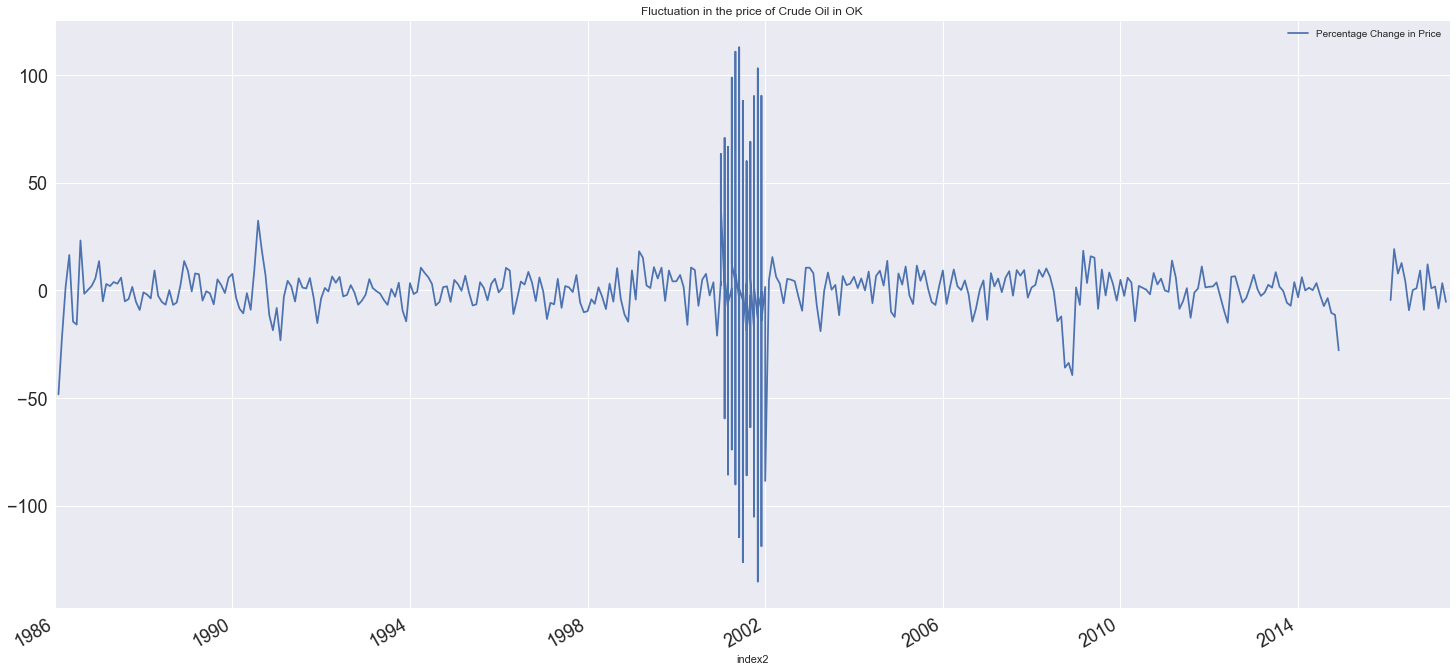

In [940]:
ChangeInCrudeOKPricesInPercentage.plot(legend=True,figsize=(25,12),title='Fluctuation in the price of Crude Oil in OK',fontsize=18,label='Percentage Change in Price')

In [941]:
ChangeInCrudeOKPricesInPercentage.sort_values(ascending=True).head()

index2
2001-11-01   -135.336049
2001-07-01   -126.333712
2001-12-01   -118.875709
2001-06-01   -114.746377
2001-10-01   -105.142084
Name: Crude_OK_WTI_Spot_Price_FOB_Per_Barrel, dtype: float64

In [942]:
MinDfFull.to_csv('MinOfAll.csv')

In [943]:
MinDfFull = dfFull.cummin()

In [944]:
dfFull[dfFull.Propane_TX_MontBelvieu_Spot_Price_FOB == 0.209 ]

,Date,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB,ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB,RBOBGasoline_LA_Reformulated_Reg_Spot_Price,HeatingOil_NY_Harbor2_Spot_Price_FOB,DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price,DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price,DieselFuelUltraLowSulfer_CARB_LA_Spot_Price,KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB,Propane_TX_MontBelvieu_Spot_Price_FOB
155,1998-12-15,0.270238,0.23381,0.307,0.294,NaN,0.313,NaN,NaN,0.391,0.304,0.209


In [945]:
MinDfFull.min(axis=0)

Date                                                 1986-01-15 00:00:00
Crude_OK_WTI_Spot_Price_FOB_Per_Barrel                          0.270238
Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel                      0.23381
ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB                        0.307
ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB                     0.294
RBOBGasoline_LA_Reformulated_Reg_Spot_Price                        0.949
HeatingOil_NY_Harbor2_Spot_Price_FOB                               0.304
DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price                     0.979
DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price                  0.958
DieselFuelUltraLowSulfer_CARB_LA_Spot_Price                        0.391
KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB                        0.304
Propane_TX_MontBelvieu_Spot_Price_FOB                              0.209
dtype: object

In [946]:
MinimumCrudeOilPrices = Crude_OK_WTI_Spot_Price_FOB_Per_Barrel_Series.sort_index(ascending=True)

In [947]:
ResultMinimumCrudeOilPrices = MinimumCrudeOilPrices.cummin()

In [948]:
ResultMinimumCrudeOilPrices.head()

Date
1986-01-01    0.545952
1986-02-01    0.368095
1986-03-01    0.300238
1986-04-01    0.300238
1986-05-01    0.300238
Name: Crude_OK_WTI_Spot_Price_FOB_Per_Barrel, dtype: float64

In [949]:
df.columns

Index([                                             u'Date',
                  u'Crude_OK_WTI_Spot_Price_FOB_Per_Barrel',
             u'Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel',
             u'ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB',
          u'ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB',
             u'RBOBGasoline_LA_Reformulated_Reg_Spot_Price',
                    u'HeatingOil_NY_Harbor2_Spot_Price_FOB',
          u'DieselFuelUltraLowSulfer2_NY_Harbor_Spot_Price',
       u'DieselFuelUltraLowSulfer2_US_GulfCoast_Spot_Price',
             u'DieselFuelUltraLowSulfer_CARB_LA_Spot_Price',
             u'KeroseneJetFuel_US_GulfCoast_Spot_Price_FOB',
                   u'Propane_TX_MontBelvieu_Spot_Price_FOB'],
      dtype='object')

In [950]:
df.set_index('Date',inplace=True)

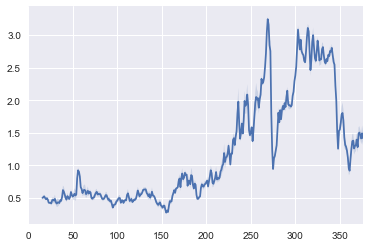

In [951]:
sns.tsplot([df.ConvenGasoline_NY_Harbor_Reg_Spot_Price_FOB,df.Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,df.ConvenGasoline_US_GulfCoast_Reg_Spot_Price_FOB])

## Prediction

In [952]:
df1Pred = df1.copy()

In [953]:
data3 = np.array([
                ['Index','Date','Crude_OK_WTI_Spot_Price_FOB_Per_Barrel','Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel'], 
                ['1','2017-06-15 00:00:00',0,0],
                ['2','2017-07-15 00:00:00',0,0],
                ['3','2017-08-15 00:00:00',0,0],
                ['4','2017-09-15 00:00:00',0,0],
                ['5','2017-10-15 00:00:00',0,0],
                ['6','2017-11-15 00:00:00',0,0],
                ['7','2017-12-15 00:00:00',0,0]
            ])
df1_DateTestSet = pd.DataFrame(data=data3[1:,1:],
                  index=data3[1:,0],
                  columns=data3[0,1:])

In [954]:
df1_DateTestSet.Date.astype(datetime64)

1   2017-06-15
2   2017-07-15
3   2017-08-15
4   2017-09-15
5   2017-10-15
6   2017-11-15
7   2017-12-15
Name: Date, dtype: datetime64[ns]

In [955]:
df1_DateTestSet['Date'] = pd.to_datetime(df1_DateTestSet['Date'])
df1_DateTestSet['Date']=df1_DateTestSet['Date'].map(dt.datetime.toordinal)

In [956]:
df1_DateTestSet

,Date,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel
1,736495,0,0
2,736525,0,0
3,736556,0,0
4,736587,0,0
5,736617,0,0
6,736648,0,0
7,736678,0,0


In [957]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [958]:
regr = linear_model.LinearRegression()

In [959]:
df1Pred.dropna(axis=0, inplace=True)

In [960]:
df1Pred.head()
len(df1Pred)

,Crude_OK_WTI_Spot_Price_FOB_Per_Barrel,Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel,Date
Date,,,
1987-05-01,0.462857,0.442381,1987-05-01
1987-06-01,0.477857,0.449048,1987-06-01
1987-07-01,0.508095,0.472857,1987-07-01
1987-08-01,0.483571,0.451905,1987-08-01
1987-09-01,0.465000,0.435952,1987-09-01


361

In [961]:
# X Independent variable
# Y Dependent variable

In [962]:
import datetime as dt
df1Pred['Date'] = pd.to_datetime(df1Pred['Date'])
df1Pred['Date']=df1Pred['Date'].map(dt.datetime.toordinal)

In [963]:
X = df1Pred.drop(['Crude_OK_WTI_Spot_Price_FOB_Per_Barrel','Crude_EuropeBrent_Spot_Price_FOB_Per_Barrel'],axis=1)
Y = df1Pred.Crude_OK_WTI_Spot_Price_FOB_Per_Barrel

In [964]:
from sklearn import linear_model
regLinear = linear_model.LinearRegression()

In [965]:
regLinear.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [966]:
test_X_vars = df1_DateTestSet.Date

In [967]:
test_X_vars = test_X_vars.to_frame()

In [968]:
results = regLinear.predict(test_X_vars)

In [969]:
results

array([ 2.10686423,  2.11242244,  2.11816592,  2.12390941,  2.12946762,
        2.13521111,  2.14076932])

In [970]:
data4 = np.array([
                ['Index','Date','Predicted_Crude_Oil_OK_Dollars_Per_Barrel'], 
                ['1','2017-06-15',2.00267844],
                ['2','2017-07-15',2.0078549],
                ['3','2017-08-15',2.01320391],
                ['4','2017-09-15',2.01855293],
                ['5','2017-10-15',2.02372939],
                ['6','2017-11-15',2.0290784],
                ['7','2017-12-15',2.03425487]
            ])
df1_PredictedValues = pd.DataFrame(data=data4[1:,1:],
                  index=data4[1:,0],
                  columns=data4[0,1:])

In [971]:
df1_PredictedValues.set_index('Date',inplace=True)

In [972]:
df1_PredictedValues

,Predicted_Crude_Oil_OK_Dollars_Per_Barrel
Date,
2017-06-15,2.00267844
2017-07-15,2.0078549
2017-08-15,2.01320391
2017-09-15,2.01855293
2017-10-15,2.02372939
2017-11-15,2.0290784
2017-12-15,2.03425487


In [973]:
df1_PredictedValues.index.astype(datetime64)

DatetimeIndex(['2017-06-15', '2017-07-15', '2017-08-15', '2017-09-15',
               '2017-10-15', '2017-11-15', '2017-12-15'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

In [977]:
X.shape
test_X_vars.shape

(361, 1)

(7, 1)

## Thank you !